# Импортируем необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


# Генерируем случайные данные для всех групп

In [2]:
np.random.seed(42) # Устанавливаем seed для воспроизводимости результатов

data_group1 = np.random.normal(loc=100, scale=20, size=100) # Случайные данные для группы 1 (среднее=100, стандартное отклонение=20)
data_group2 = np.random.normal(loc=110, scale=20, size=100) # Случайные данные для группы 2 (среднее=110, стандартное отклонение=20)

# Расчет доверительных интервалов для средних значених

In [3]:
# Устанавливаем уровень доверия 95%
confidence_level = 0.95

# Вычисляем среднее значение группы 1
mean_value_group1 = np.mean(data_group1)

# Вычисляем стандартную ошибку среднего для группы 1
# Для этого сначала вычисляем стандартное отклонение (используя параметр `ddof=1` для несмещенной оценки),
# а затем делим его на квадратный корень из количества наблюдений в группе.
standard_error_group1 = np.std(data_group1, ddof=1) / np.sqrt(len(data_group1))

# Вычисляем величину допустимой погрешности для группы 1
# Для этого умножаем стандартную ошибку на критическое значение t-распределения,
# соответствующее заданному уровню доверия и числу степеней свободы (количество наблюдений минус один).
margin_of_error_group1 = standard_error_group1 * np.abs(stats.t.ppf((1 - confidence_level) / 2, len(data_group1) - 1))

# Вычисляем нижнюю и верхнюю границы доверительного интервала для среднего значения группы 1
lower_bound_group1 = mean_value_group1 - margin_of_error_group1
upper_bound_group1 = mean_value_group1 + margin_of_error_group1

# Вычисляем среднее значение группы 2
mean_value_group2 = np.mean(data_group2)

# Вычисляем стандартную ошибку среднего для группы 2
standard_error_group2 = np.std(data_group2, ddof=1) / np.sqrt(len(data_group2))

# Вычисляем величину допустимой погрешности для группы 2
margin_of_error_group2 = standard_error_group2 * np.abs(stats.t.ppf((1 - confidence_level) / 2, len(data_group2) - 1))

# Вычисляем нижнюю и верхнюю границы доверительного интервала для среднего значения группы 2
lower_bound_group2 = mean_value_group2 - margin_of_error_group2
upper_bound_group2 = mean_value_group2 + margin_of_error_group2

# Визуализация результатов

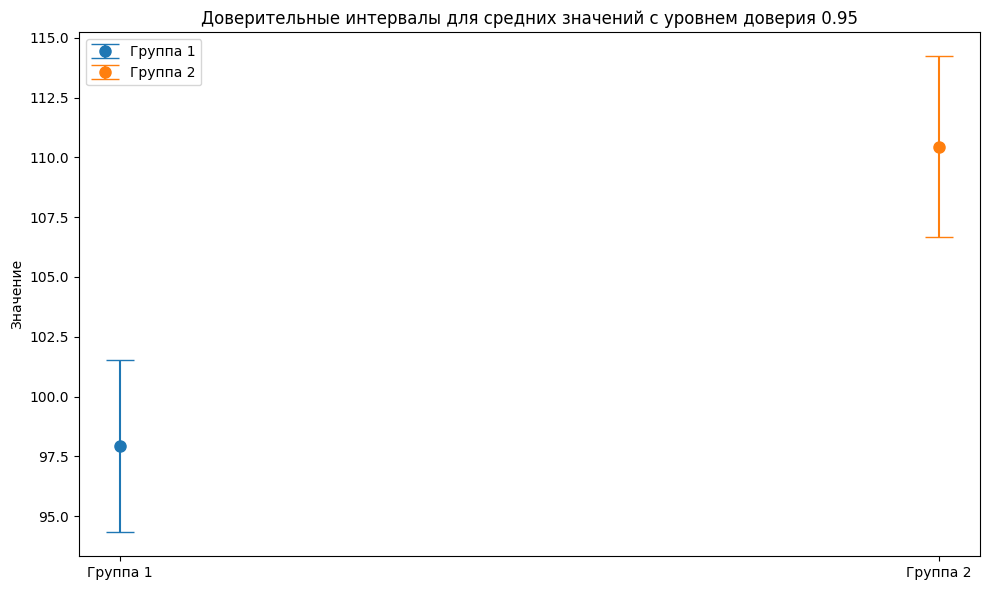

Группа 1: Доверительный интервал для среднего значения [94.32, 101.53], Среднее значение 97.92
Группа 2: Доверительный интервал для среднего значения [106.66, 114.23], Среднее значение 110.45


In [4]:
# Создаем новую фигуру для построения графика
plt.figure(figsize=(10, 6))

# Строим график для обеих групп
plt.errorbar(1, mean_value_group1, yerr=margin_of_error_group1, fmt='o', markersize=8, capsize=10, label='Группа 1')
plt.errorbar(2, mean_value_group2, yerr=margin_of_error_group2, fmt='o', markersize=8, capsize=10, label='Группа 2')
plt.xticks([1, 2], ['Группа 1', 'Группа 2'])
plt.ylabel('Значение')
plt.title(f'Доверительные интервалы для средних значений с уровнем доверия {confidence_level}')
plt.legend()
plt.tight_layout()
plt.show()
# Интерпретация результатов
print(f'Группа 1: Доверительный интервал для среднего значения [{lower_bound_group1:.2f}, {upper_bound_group1:.2f}], Среднее значение {mean_value_group1:.2f}')
print(f'Группа 2: Доверительный интервал для среднего значения [{lower_bound_group2:.2f}, {upper_bound_group2:.2f}], Среднее значение {mean_value_group2:.2f}')